In [8]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from keras.datasets import cifar10

In [3]:
def residual_block(filters):
    model = Sequential()
    model.add(Conv2D(filters, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters, (3,3), padding='same', activation='relu'))
    return model

In [6]:
def build_resnet(depth):
    ''' Defines a resnet model with the specified depth. '''
    model = Sequential()
    model.add(Conv2D(64, (7,7), padding='same', activation='relu', input_shape=(32,32,3)))
    model.add(MaxPooling2D((3,3), strides=(2,2)))

    for i in range(depth - 2):
        model.add(residual_block(64))

    model.add(Conv2D(10, (1,1), padding='same', activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    return model

In [9]:
model = build_resnet(30)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 sequential_3 (Sequential)   (None, 15, 15, 64)        73856     
                                                                 
 sequential_4 (Sequential)   (None, 15, 15, 64)        73856     
                                                                 
 sequential_5 (Sequential)   (None, 15, 15, 64)        73856     
                                                                 
 sequential_6 (Sequential)   (None, 15, 15, 64)        73856     
                                                      

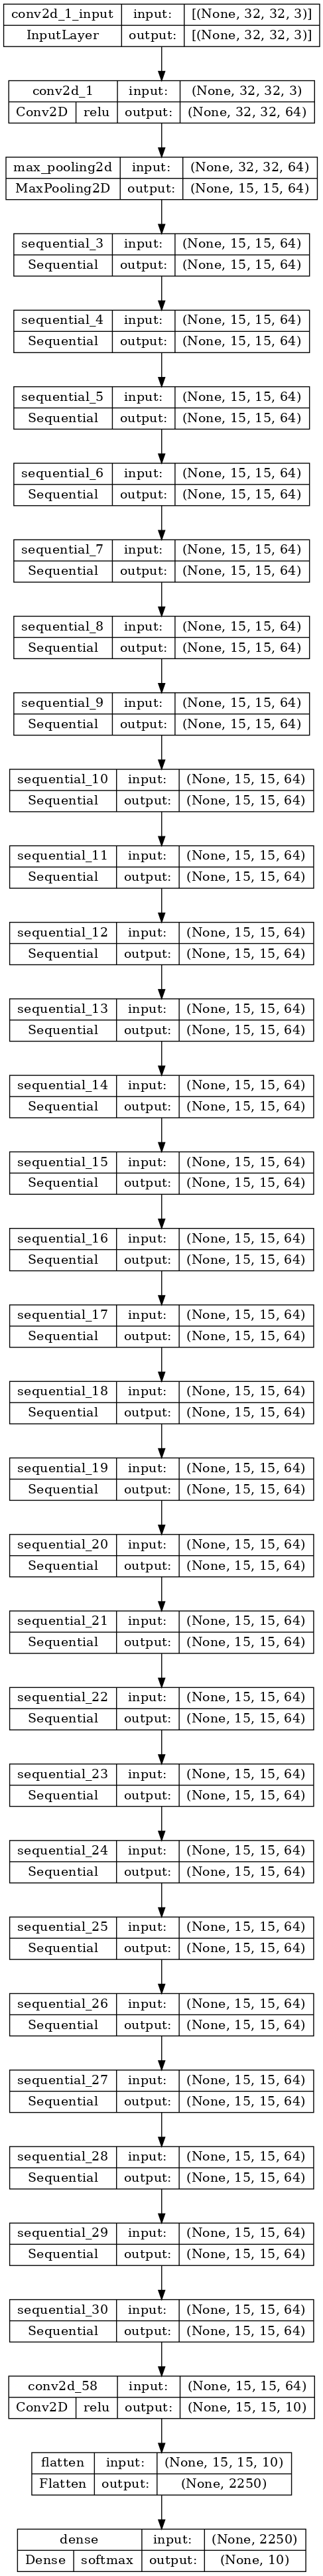

In [10]:
from keras.utils import plot_model

plot_model(model=model, show_layer_activations=True, show_shapes=True, show_layer_names=True, dpi=100)

In [11]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 478s 300ms/step - loss: 2.3028 - accuracy: 0.0979
Epoch 2/10
 276/1563 [====>.........................] - ETA: 6:27 - loss: 2.3028 - accuracy: 0.1010

KeyboardInterrupt: 